<a href="https://colab.research.google.com/github/sita-aghasoy33/Scientific-Computing-with-Python-by-Freecodecamp.org/blob/main/sci_comp_8_1_shortest_path_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **8. Learn Algorithm Design by Building a Shortest Path Algorithm**

[go to the task in official web-site: www.freecodecamp.org](https://www.freecodecamp.org/learn/scientific-computing-with-python/#learn-algorithm-design-by-building-a-shortest-path-algorithm)

## **Dijkstra's Algorithm: Brief Explanation**

**Purpose:**
Dijkstra's algorithm computes the shortest path from a given starting node to all other nodes in a weighted graph, ensuring that the path cost is minimized.


**Initialization:**
* Start with a list of unvisited nodes.
* Assign an initial distance of 0 to the starting node and ∞ to all other nodes.
* Maintain a record of paths for each node.

**Selection of the Current Node:**
* From the unvisited nodes, select the node with the smallest known distance (initially the start node).

**Relaxation:**
* For each neighbor of the current node, calculate the potential new distance through the current node.
* If this distance is shorter, update the shortest distance and record the path.

**Mark as Visited:**
* Remove the current node from the unvisited list and repeat until all nodes are visited or the target is reached.

**Output:**
* *Distances:* The shortest distance from the start node to each node.
* *Paths:* The sequence of nodes forming the shortest path.

**Complexity:**
* Time complexity is ***O(V2)O(V2)*** for an adjacency matrix and ***O((V+E)log⁡V)O((V+E)logV)*** with a priority queue (not used here).

**Example Use Cases:**
Network routing
GPS navigation systems
Game AI for shortest pathfinding

## **Graphs**
Graphs are data structures representing relations between pairs of elements. These elements, called nodes, can be real-life objects, entities, points in space or others. The connections between the nodes are called the edges.


---

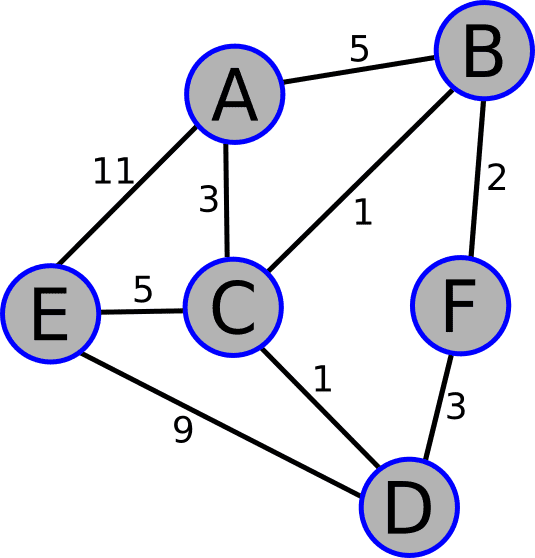


For example, a graph can be used to represent two points in the space, A and B, connected by a path. A graph like this will be made of two nodes connected by an edge.

In [3]:
# create graphs as dictionaries
# each key represent a node and the value represents the other node(s)
# that is (are) connected to the node epxressed as key of dictionary.

my_graph = {
    'A': 'B',
    'B': 'A'
}

my_graph = {
    'A': 'B',
    'B': ['A', 'C'],
    'C': 'B'
}

my_graph = {
    'A': ['B', 'D'],
    'B': ['A', 'C'],
    'C': ['B', 'D'],
    'D': ['A', 'C']
}

A graph is called a weighted graph when its edges are associated with weights, representing a distance, time or other quantitative value.

In your case, these weights will be the distances between each node, or point in space. To represent a weighted graph you can modify your dictionary, using a list of tuples for each value.

In order to show a weighted graph we add distances to the list of connected nodes. We create a list of tuples that contain node and distance to the key node and assign that key to the value.


In [4]:
# create graph as dictionary with main node as key
# and list of tuples with distances and nodes as value
my_graph = {
    'A': [('B', 3), ('D', 1)],
    'B': [('A', 3), ('C', 4)],
    'C': [('B', 4), ('D', 7)],
    'D': [('A', 1), ('C', 7)]  # this will be an input to test our functions
}

list(my_graph) # while converting dictionary to list, we get list of keys.

['A', 'B', 'C', 'D']

In [5]:
# different ways of converting dict to list
list(my_graph) == list(my_graph.keys())
list(my_graph.keys())

['A', 'B', 'C', 'D']

https://www.freecodecamp.org/learn/scientific-computing-with-python/#learn-algorithm-design-by-building-a-shortest-path-algorithm

## **Create functions for shortest path**

In [6]:
# create dictinary for graph to use as input
my_graph1 = {
    'A': [('B', 3), ('D', 1)],
    'B': [('A', 3), ('C', 4)],
    'C': [('B', 4), ('D', 7)],
    'D': [('A', 1), ('C', 7)]
}

my_graph2 = {
    'A': [('B', 5), ('C', 3), ('E', 11)],
    'B': [('A', 5), ('C', 1), ('F', 2)],
    'C': [('A', 3), ('B', 1), ('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 9), ('F', 3)],
    'E': [('A', 11), ('C', 5), ('D', 9)],
    'F': [('B', 2), ('D', 3)]
}

In [7]:
# Define a function to find the shortes path
def shortest_path(graph, start):
    """
    Define a function to find the shortes path
    between the given 'start' node and the other nodes in the graph.

    Args:
        graph (dict): A dictionary representing the graph.
        start (str): The starting node for the shortest path search.

    Returns:
        None

    Print:
        Unvisited: A list of nodes that have not been visited yet (an empty list)
        Distances: A dictionary mapping each node to its shortest distance from the 'start' node.
        Paths: A dictionary mapping each node to its shortest path from the 'start' node.

    Raises:
        KeyError: If the 'start' node is not found in the graph.
        TypeError: If the 'graph' argument is not a dictionary.
        TypeError: If a required arguments is not given.

    Examples:
        >>> shortest_path(my_graph, "A")
        Unvisited: []
        Distances: {'A': 0, 'B': 3, 'C': 4, 'D': 1}
        Paths: {'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'B', 'C'], 'D': ['A', 'D']}
    """
    # create list of nodes and name it 'unvisited'
    unvisited = list(graph) # stores the remained nodes after finalising track
    # create a dict to store distances, initialize all as infite
    distances = {node: 0 if node == start else float('inf') for node in graph}
    # create a dict to store pathes from the 'start' node to all other nodes
    paths = {node: [] for node in graph}
    paths[start].append(start) # from 'start' node to itself the path equals 'start' node itself

    # untill the all nodes are visited run the below-mentioned code
    while unvisited:
        # find the 'current' node by finding the the node with minimum distance
        # it shows where we stand right now
        current = min(unvisited, key=distances.get)

        # take current node as a key of main graph,
        # and iterate over its correponding value: list of tuples
        # the first element of tuple is node, and the second is distance to it
        for node, distance in graph[current]:
            # if going through the current node gives a shorter path to node
            # compared to the currently known shortest distance 'distances[node]'
            # here distance = edge weight between current and node
            # distances[current] = the shortest distance from the start node to current.
            # the below code gives True for 'inf' distances
            if distance + distances[current] < distances[node]:
                # if True assign new distance instead of old, cause it is shorter.
                distances[node] = distance + distances[current]
                # if there is an older path to the this node...
                if paths[node] and paths[node][-1] == node:
                    paths[node] = paths[current][:] #...update it with shorter one
                else: # if the path for this node does not exist...
                    paths[node].extend(paths[current])  # get the full path from start node...
                paths[node].append(node) #...add it among the paths
        # remove the 'current' node from 'unvisited' list, because it has been visited
        unvisited.remove(current)
    # print results
    print(f'Unvisited: {unvisited}\nDistances: {distances}\nPaths: {paths}')

In [8]:
def main():
    shortest_path(my_graph1, "A")
    print("")
    shortest_path(my_graph2, "B")

if __name__ == "__main__":
    main()

Unvisited: []
Distances: {'A': 0, 'B': 3, 'C': 7, 'D': 1}
Paths: {'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'B', 'C'], 'D': ['A', 'D']}

Unvisited: []
Distances: {'A': 4, 'B': 0, 'C': 1, 'D': 2, 'E': 6, 'F': 2}
Paths: {'A': ['B', 'C', 'A'], 'B': ['B'], 'C': ['B', 'C'], 'D': ['B', 'C', 'D'], 'E': ['B', 'C', 'E'], 'F': ['B', 'F']}


In [9]:
# Define a function that finds shortest path between given start and target node
def shortest_path(graph, start, target = ''):
    """
    Define a function to find the shortes path
    between the given 'start' node and the other nodes in the graph.

    Args:
        graph (dict): A dictionary representing the graph.
        start (str): The starting node for the shortest path search.
        target (str): The target node for the shortest path search.

    Returns:
        distances (dict): A dictionary mapping each node to its shortest distance from the 'start' node.
        paths (dict): A dictionary mapping each node to its shortest path from the 'start' node.
        tuple: (distances, paths)

    Print:
        distance and path for given start and target nodes.

    Raises:
        KeyError: If the 'start' node is not found in the graph.
        TypeError: If the 'graph' argument is not a dictionary.
        TypeError: If a required arguments is not given.

    Examples:
        >>> shortest_path(my_graph, "A")
        Unvisited: []
        Distances: {'A': 0, 'B': 3, 'C': 4, 'D': 1}
        Paths: {'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'B', 'C'], 'D': ['A', 'D']}

        >>> shortest_path(my_graph, "A", "F")
        Unvisited: []
        Distances: {'A': 0, 'B': 3, 'C': 4, 'D': 1, 'F': 5}
        Paths: {'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'B', 'C'], 'D': ['A', 'D'], 'F': ['A', 'B', 'F']}
    """
    # create initial lists and dictionaries
    unvisited = list(graph)
    distances = {node: 0 if node == start else float('inf') for node in graph}
    paths = {node: [] for node in graph}
    paths[start].append(start)

    # until all nodes are visited
    while unvisited:
        # for the current node
        current = min(unvisited, key=distances.get)
        for node, distance in graph[current]:
            # find the shortest distance to subsequent node
            if distance + distances[current] < distances[node]:
                distances[node] = distance + distances[current] # and assign it
                # if there is already a path for this node...
                if paths[node] and paths[node][-1] == node:
                    paths[node] = paths[current][:] # ...replace it with shortest so far.
                else: # if not...
                    paths[node].extend(paths[current]) # ...get the full path from start...
                paths[node].append(node) # and add it among paths.
        # remove already visited node from 'unvisited' list.
        unvisited.remove(current)

    #  if target is provided assign it as list (to iterate), if not, take the whole graph
    targets_to_print = [target] if target else graph
    # for each node in target that is not equal to the 'start' node...
    for node in targets_to_print:
        if node == start:
            continue # ...print the distance and path
        print(f'\n{start}-{node} distance: {distances[node]}\nPath: {" -> ".join(paths[node])}')

    return distances, paths

In [10]:
def main():
    shortest_path(my_graph1, 'A')
    shortest_path(my_graph2, 'A', 'A')

if __name__ == "__main__":
    main()


A-B distance: 3
Path: A -> B

A-C distance: 7
Path: A -> B -> C

A-D distance: 1
Path: A -> D
